#Housing and real estate market is one of the major contributors in the world’s economy.
With the help of Data science it has become easier to  help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases.
The present project is associated with a US-based housing company named Surprise Housing which is planning to enter the Australian market. 
The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price.
The company is looking at prospective properties to buy houses to enter the market. 
We are trying to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
Thus, with the present modelwe will predict the price of houses with the available independent variables. 
This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 
Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

In [318]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

# Loading train and test Data set

In [319]:
train_data=pd.read_csv(r"C:\Users\a\Documents\PROJECTS----\Internship\Project-Housing_splitted\Train.csv")

In [320]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [321]:
train_data.shape

(1168, 81)

There are 1168 rows and 81 column in the train data set

In [322]:
test_data=pd.read_csv(r"C:\Users\a\Documents\PROJECTS----\Internship\Project-Housing_splitted\Test.csv")

In [323]:
test_data.shape

(292, 80)

There are 292 rows and 80 columns in test data set.

In [324]:
#to see all the columns
pd.set_option('display.max_rows',None)

In [325]:
train_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


Data types of all the columns

In [326]:
# to find unique values in the columns
train_data.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFin

# Finding Null values

In [327]:
#null values in training dataset
train_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Above is the total number of null values in the column

In [328]:
missing_data=(train_data.isnull().sum()/len(train_data))*100

In [329]:
missing_data=missing_data[missing_data>0]

In [330]:
missing_data.sort_values()

MasVnrType       0.599315
MasVnrArea       0.599315
BsmtQual         2.568493
BsmtCond         2.568493
BsmtFinType1     2.568493
BsmtFinType2     2.654110
BsmtExposure     2.654110
GarageCond       5.479452
GarageQual       5.479452
GarageFinish     5.479452
GarageType       5.479452
GarageYrBlt      5.479452
LotFrontage     18.321918
FireplaceQu     47.174658
Fence           79.708904
Alley           93.407534
MiscFeature     96.232877
PoolQC          99.400685
dtype: float64

percentage of null value

In [331]:
#null values in test data
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

# Dropping columns with higher percentage of nan values

In [332]:
train_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1, inplace=True)

In [333]:
test_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1, inplace=True)

Columns with more than 40 percent missing data were dropped

# EDA on Numerical Data

In [334]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,...,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,...,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,...,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,...,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [335]:
numerical_data=train_data.select_dtypes(include=[np.number])

In [336]:
numerical_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Above is the list of columns with numerical data in the train data set

In [337]:
numerical_data.shape

(1168, 38)

# Distribution plot to see the distribution of each column

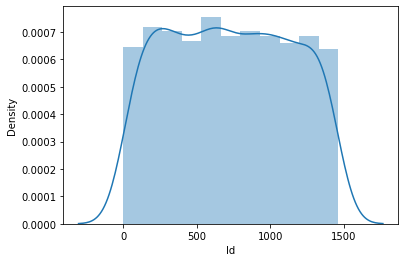

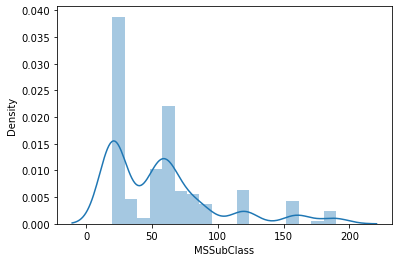

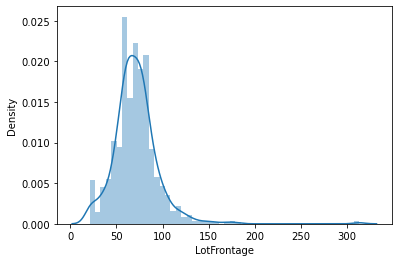

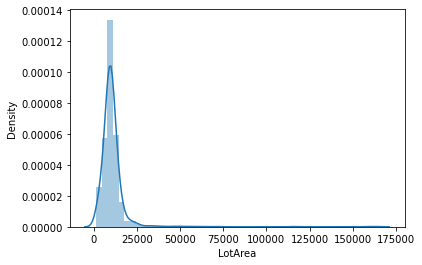

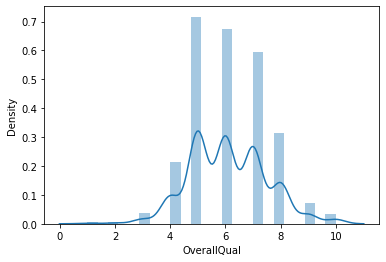

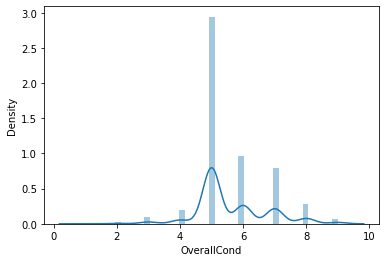

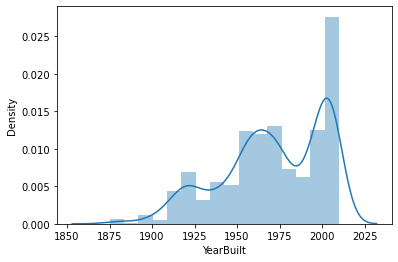

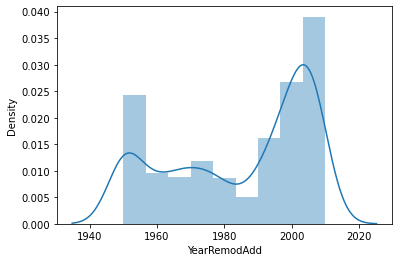

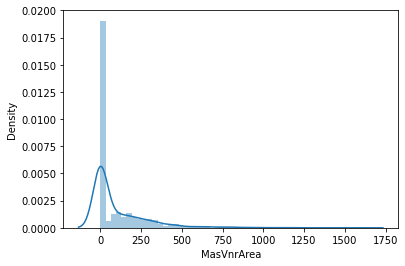

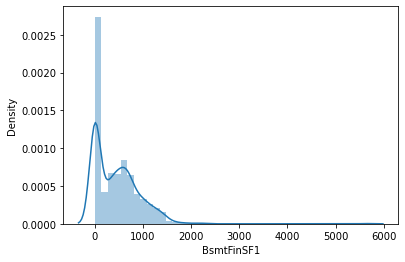

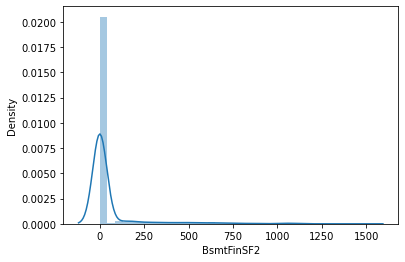

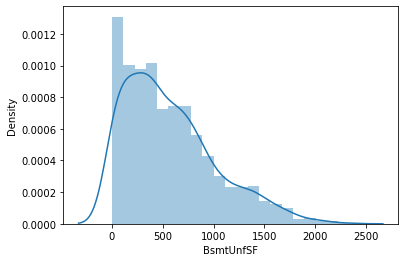

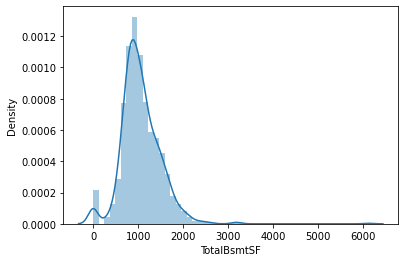

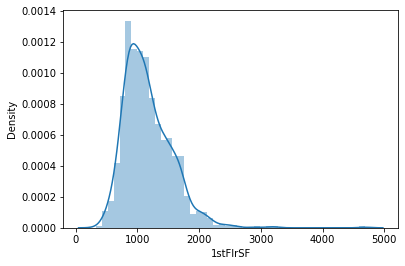

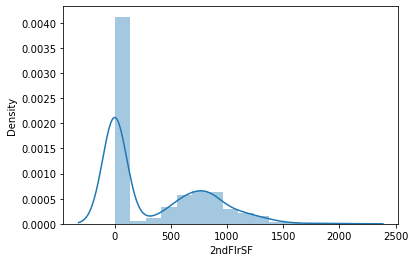

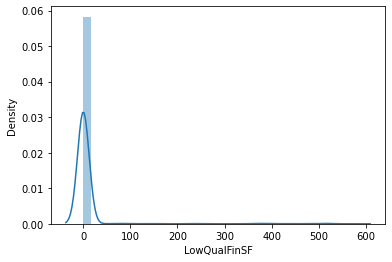

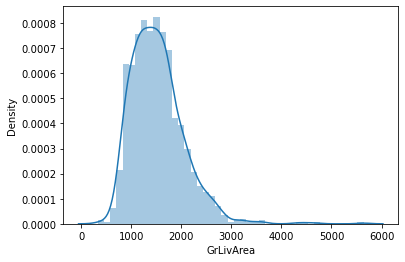

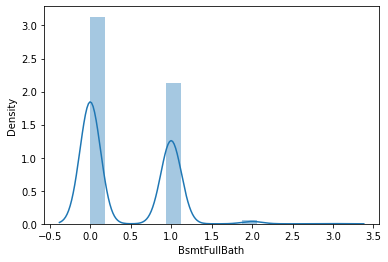

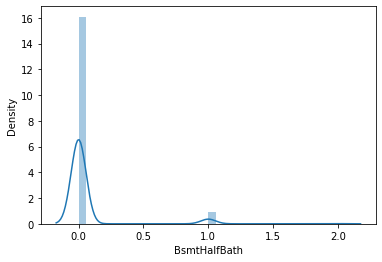

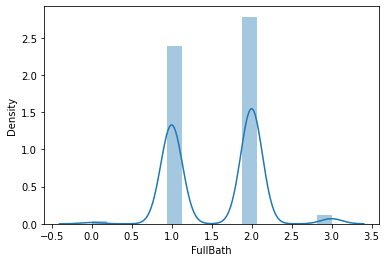

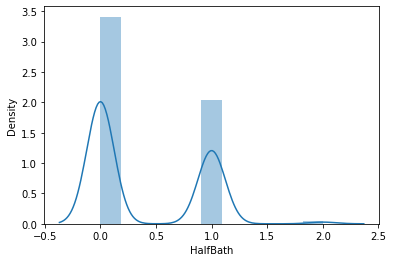

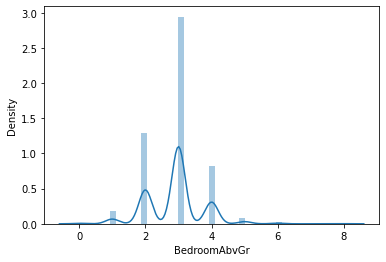

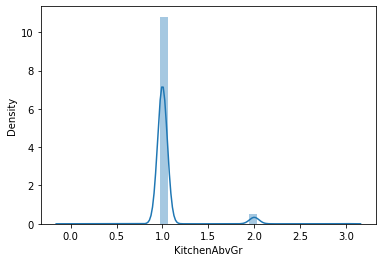

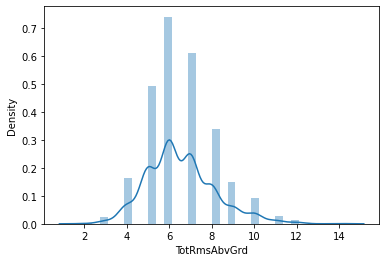

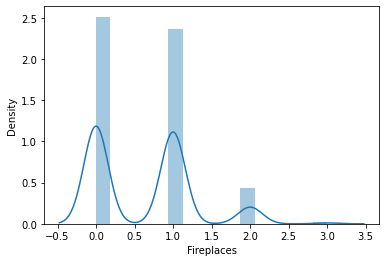

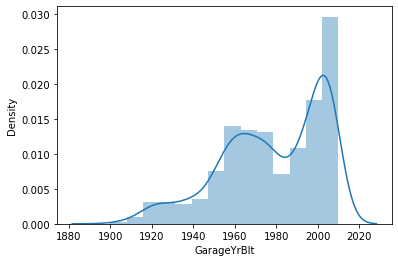

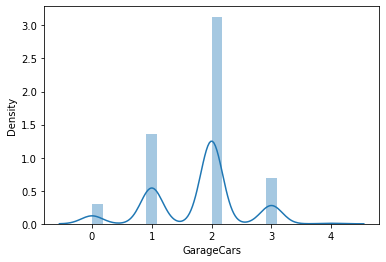

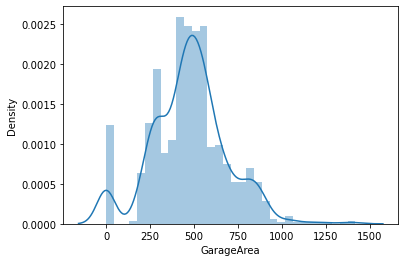

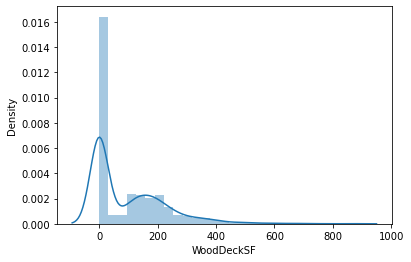

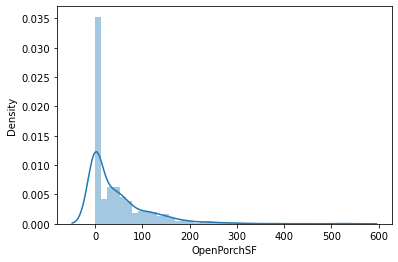

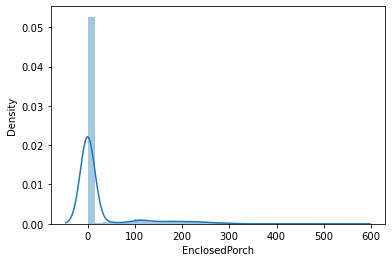

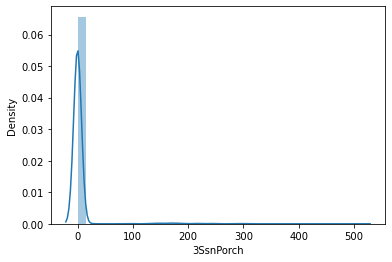

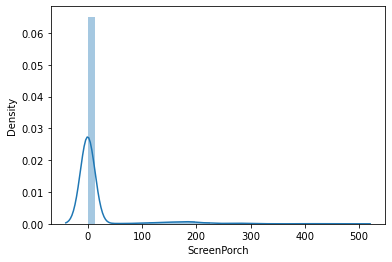

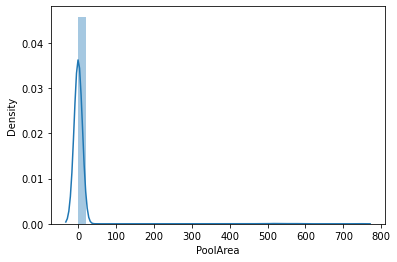

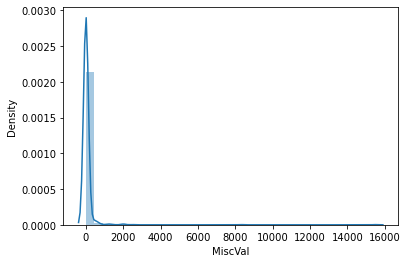

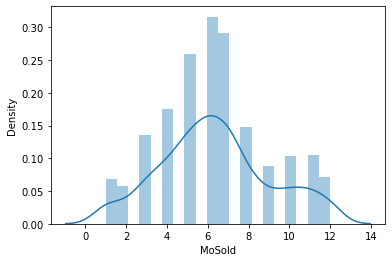

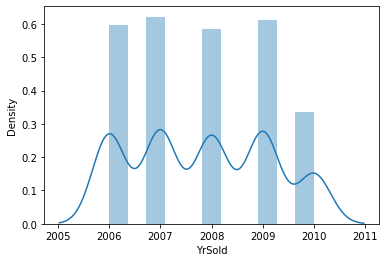

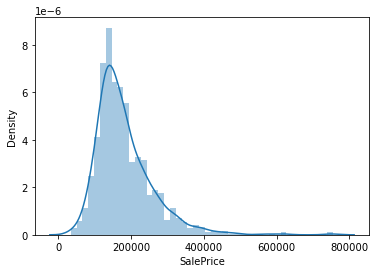

In [338]:
for i in numerical_data:
    plt.figure()
    sb.distplot(numerical_data[i])
    

Few columns like-'OverallQual', 'OverallCond', 'GarageCars','MonthSold', 'yearSold','KitchenAbvGr', 'HalfBath', 'Fullbath', 'BsmthalfBath',had discrete values which was evident from the bars.Also there was skewness in few of the columns like BsmtUnfSF, WoodDeckSF,OpenPorchSF.
Most of the houses were of average quality and the basement area of 1000 sqft.It was Strange to know that most of the houses were sold in the month of June-july and majority of the houses did not have enclosedporch included to it.

# Checking for outliers by Boxplot method

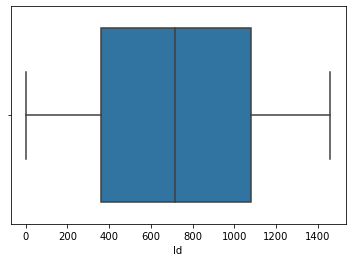

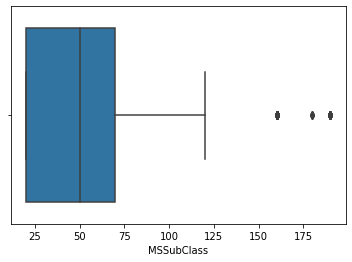

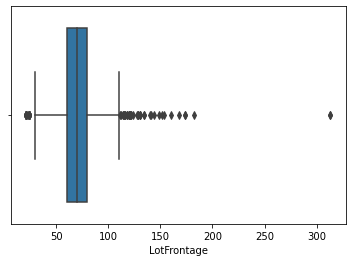

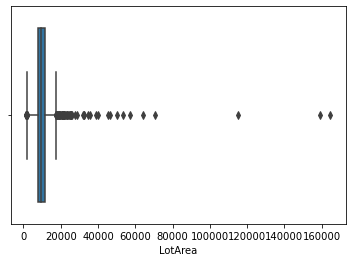

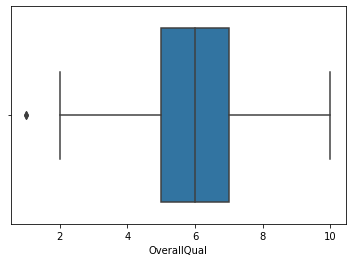

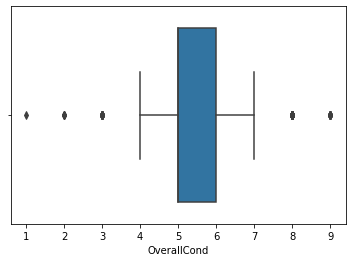

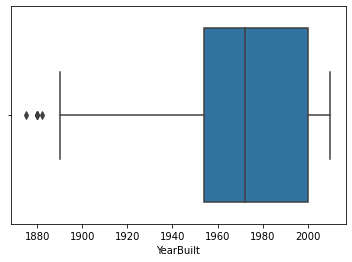

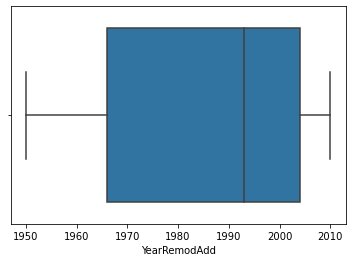

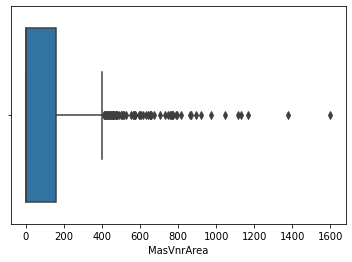

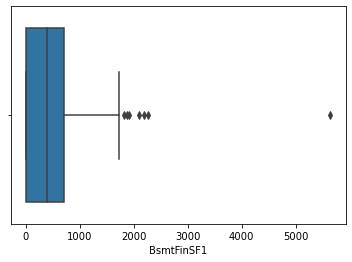

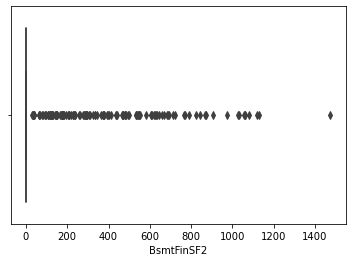

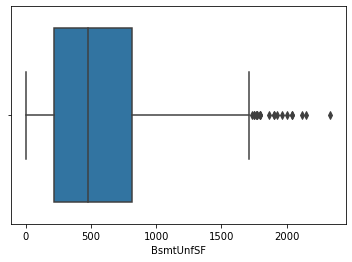

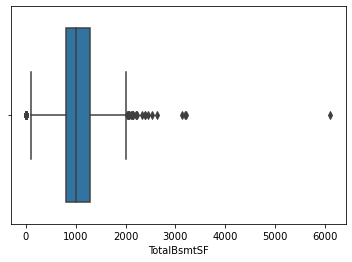

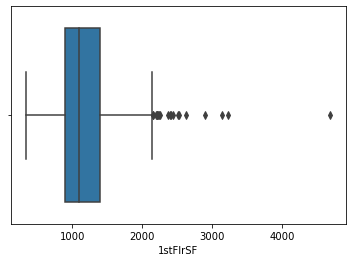

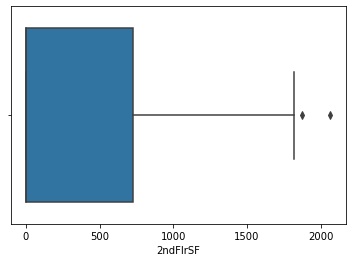

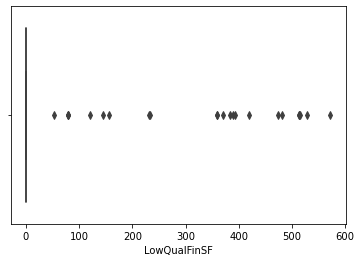

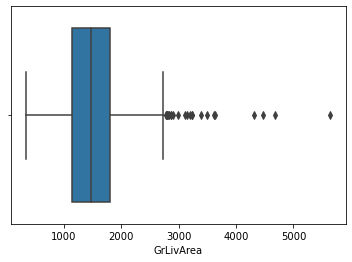

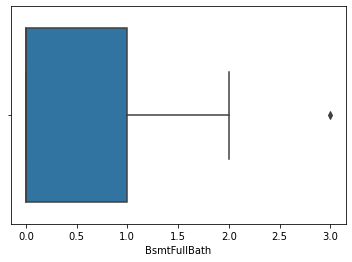

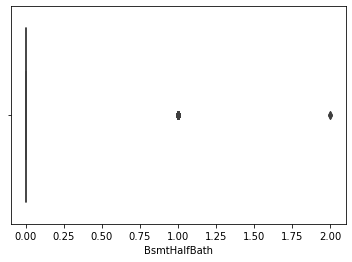

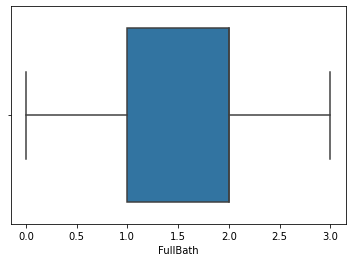

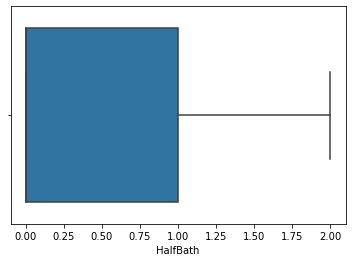

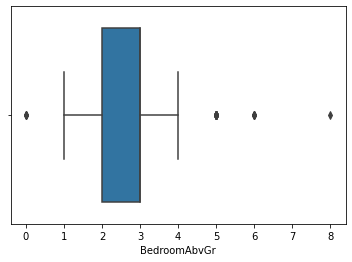

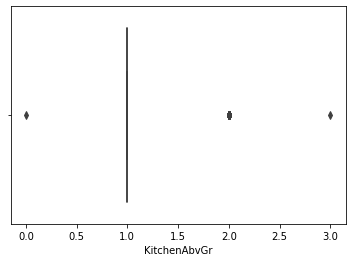

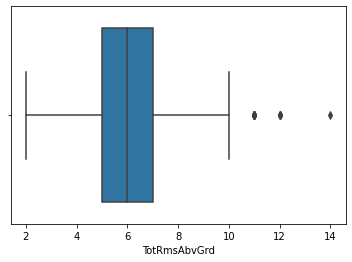

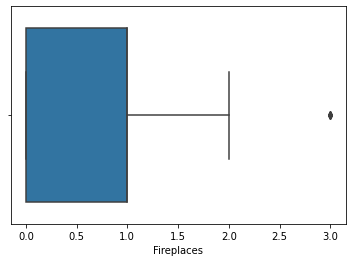

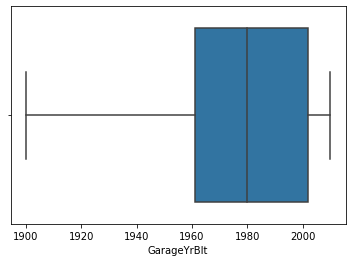

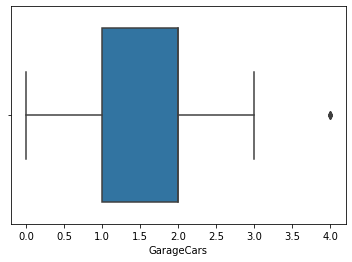

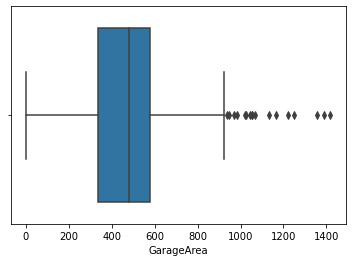

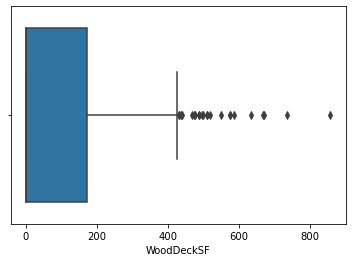

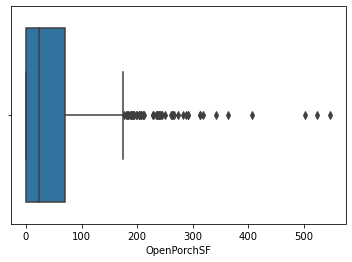

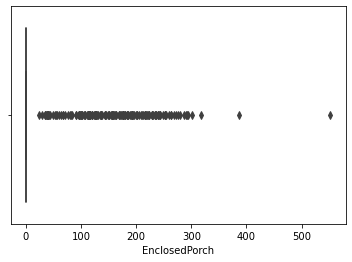

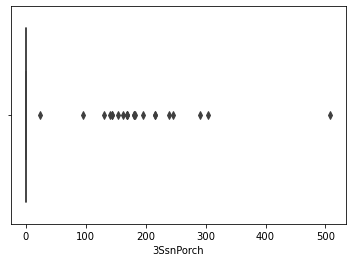

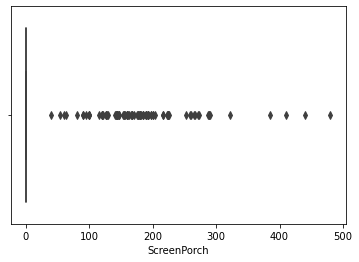

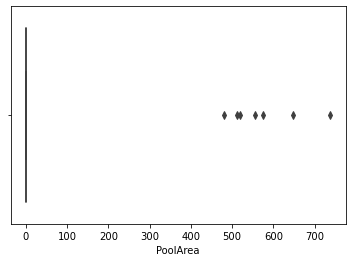

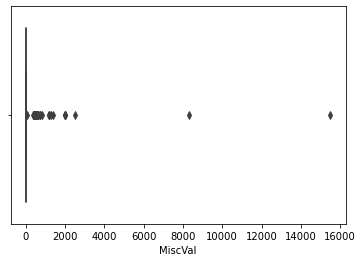

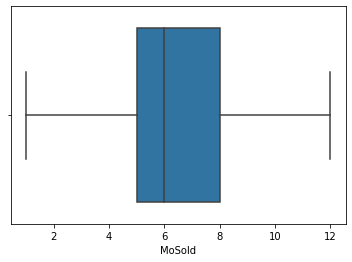

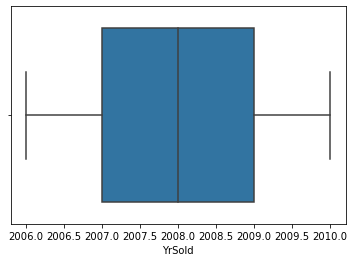

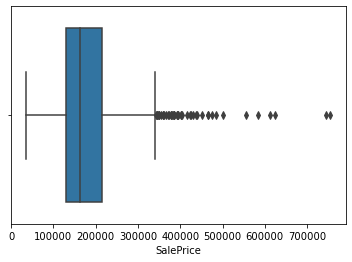

In [339]:
for i in numerical_data:
    plt.figure()
    sb.boxplot(numerical_data[i])

Columns below had outliers present ehich will be treated later
---MiscVal, PoolArea, ScreenPorch,3SsnPorch, EnclosedPorch, OpenPorchSF, WoodDeckSF, GarageArea, GrLivArea, BsmtFinSF2, BsmtFinSF1, MasVnrArea, LotArea, LotFrontage

<function matplotlib.pyplot.show(close=None, block=None)>

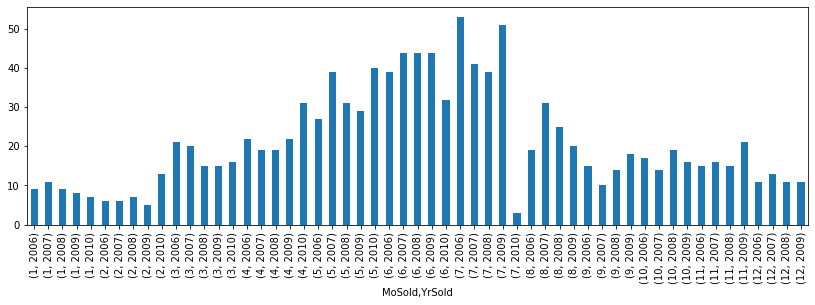

In [340]:
train_data.groupby(['MoSold', 'YrSold']).Id.count().plot(kind='bar',figsize=(14,4))
plt.show

Most of the houses were sold in the month of june and july

# Finding correlation among numerical data

<AxesSubplot:>

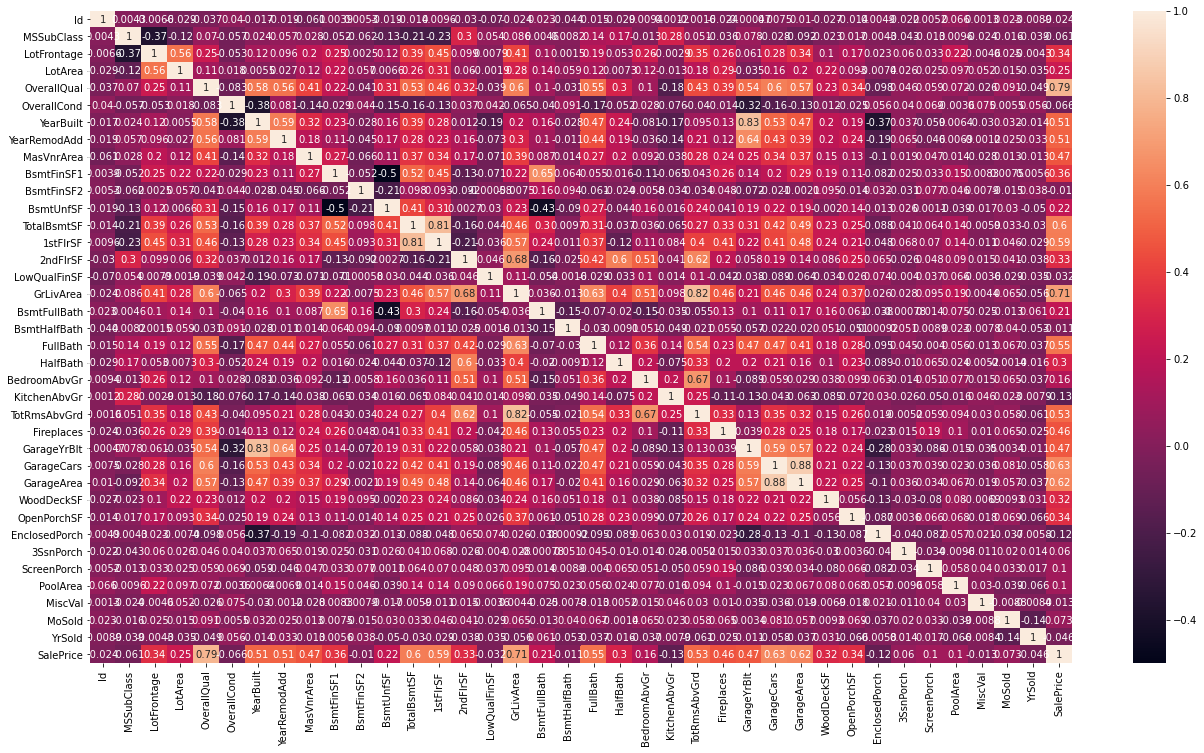

In [341]:
cor=numerical_data.corr()
plt.figure(figsize=[22,12])
sb.heatmap(cor,annot=True)



House price was found to be positively correlated to the Overall Quality,Total area of house in square feet, number of bathrooms, Garage Area, Ground floor living area, Total rooms above ground and woodDeck area. 

# Outlier removal

In [342]:
#outlier removal:
#MiscVal,PoolArea,ScreenPorch,3SsnPorch,EnclosedPorch,OpenPorchSF,WoodDeckSF,GarageArea,GrLivArea,BsmtFinSF2,BsmtFinSF1,MasVnrArea,LotArea
#,LotFrontage






In [343]:
#MiscVal
#train_data['MiscVal'].value_counts()

In [344]:
train_data.drop(train_data[train_data.MiscVal>=8000].index,inplace=True)

In [345]:
#train_data['ScreenPorch'].value_counts()

In [346]:
train_data.drop(train_data[train_data.ScreenPorch>=400].index,inplace=True)

In [347]:
#train_data['EnclosedPorch'].value_counts()

In [348]:
train_data.drop(train_data[train_data.EnclosedPorch>=325].index,inplace=True)

In [349]:
#train_data['OpenPorchSF'].value_counts()

In [350]:
train_data.drop(train_data[train_data.OpenPorchSF>=400].index,inplace=True)

In [351]:
#train_data['WoodDeckSF'].value_counts()


In [352]:
train_data.drop(train_data[train_data.WoodDeckSF>=700].index,inplace=True)

In [353]:
#train_data['GarageArea'].value_counts()

In [354]:
train_data.drop(train_data[train_data.GarageArea>=1100].index,inplace=True)

In [355]:
#train_data['GrLivArea'].value_counts()

In [356]:
train_data.drop(train_data[train_data.GrLivArea>=3000].index,inplace=True)

In [357]:
#train_data['BsmtFinSF2'].value_counts()

In [358]:
train_data.drop(train_data[train_data.BsmtFinSF2>=1200].index,inplace=True)

In [359]:
#train_data['BsmtFinSF1'].value_counts()

In [360]:
train_data.drop(train_data[train_data.BsmtFinSF1>=1500].index,inplace=True)

In [361]:
#train_data['MasVnrArea'].value_counts()

In [362]:
train_data.drop(train_data[train_data.MasVnrArea>=1000.0].index,inplace=True)

In [363]:
#train_data['LotArea'].value_counts()

In [364]:
train_data.drop(train_data[train_data.LotArea>=100000].index,inplace=True)

In [365]:
#train_data['LotFrontage'].value_counts()

In [366]:
train_data.drop(train_data[train_data.LotFrontage>=200].index,inplace=True)

# Treating skewness

In [367]:
features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']
for f in features:
    train_data.loc[:,f]=np.log1p(train_data[f])

# EDA on Categorical data

In [368]:
cat_data=train_data.select_dtypes(exclude=[np.number])

In [369]:
cat_data.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

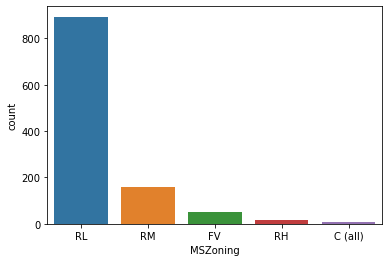

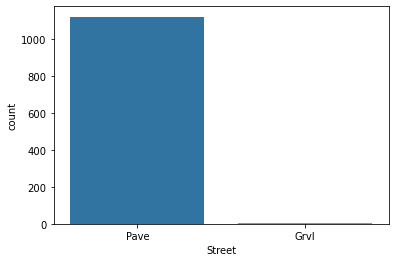

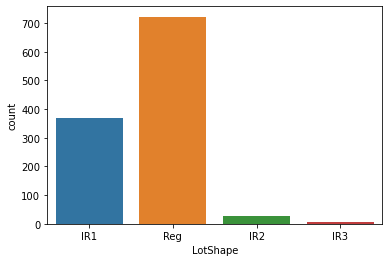

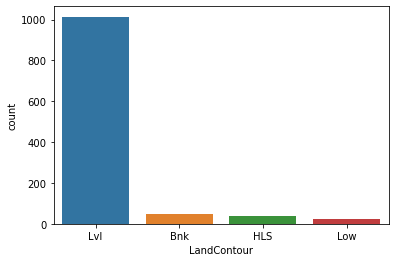

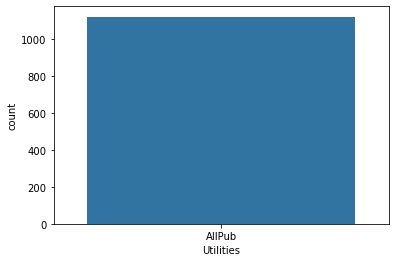

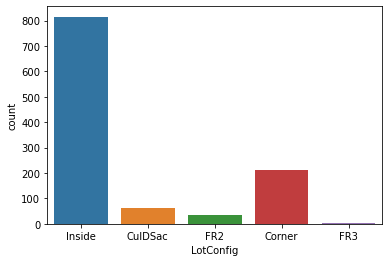

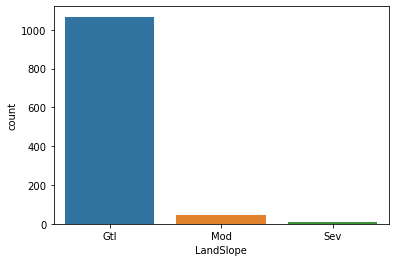

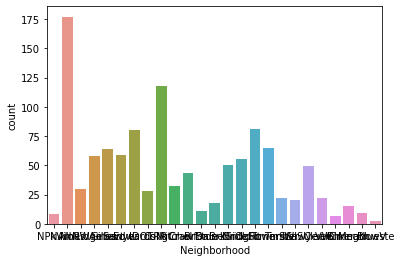

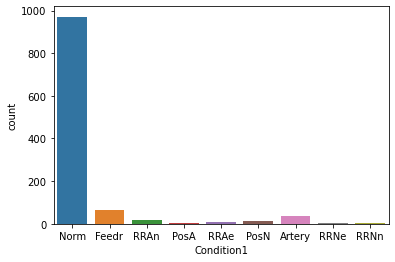

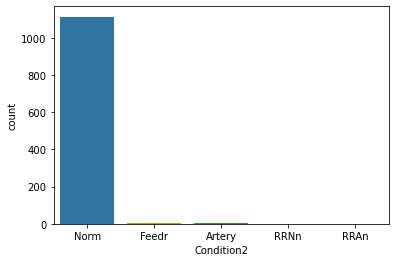

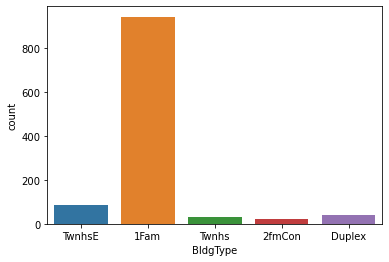

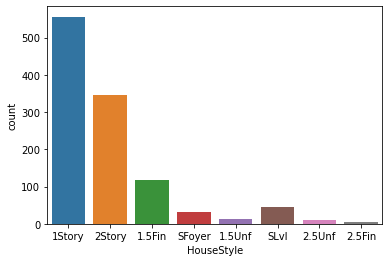

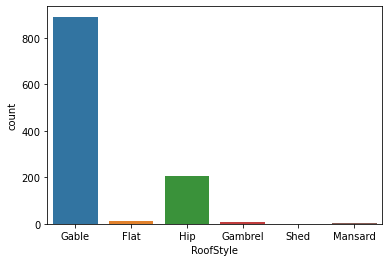

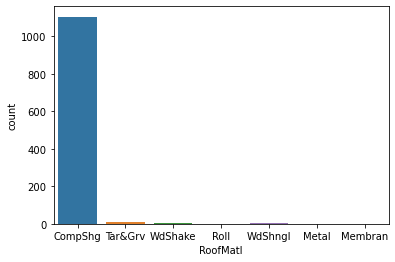

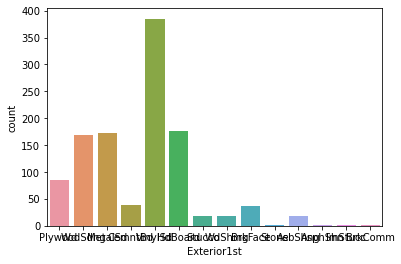

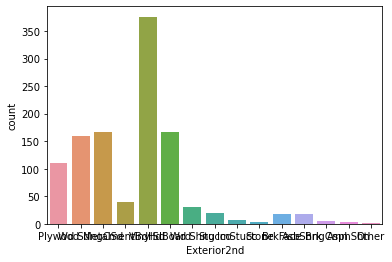

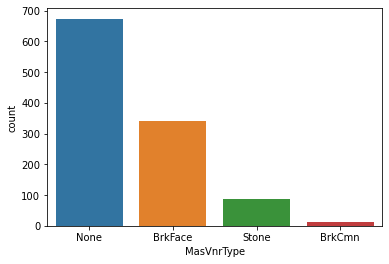

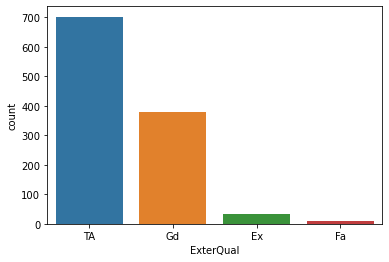

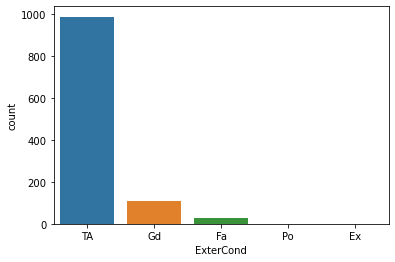

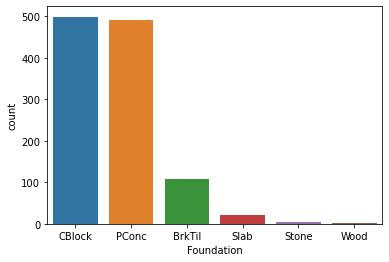

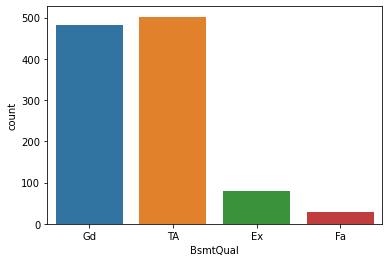

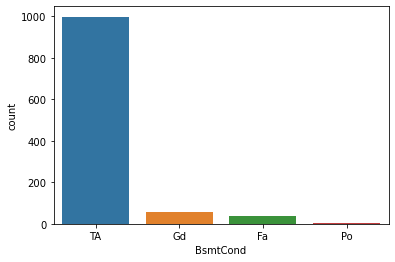

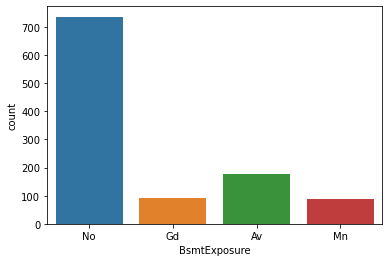

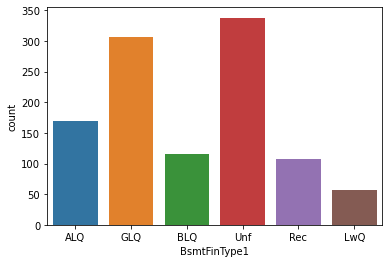

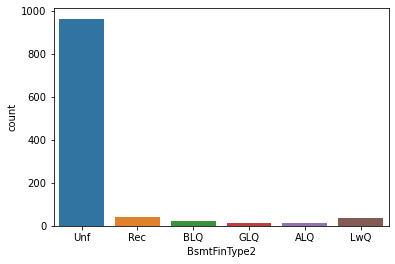

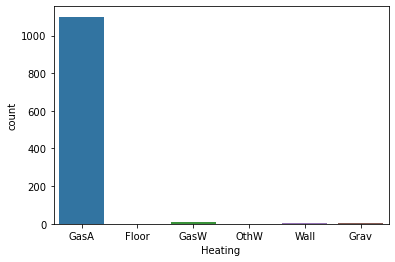

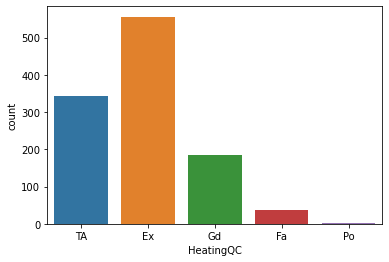

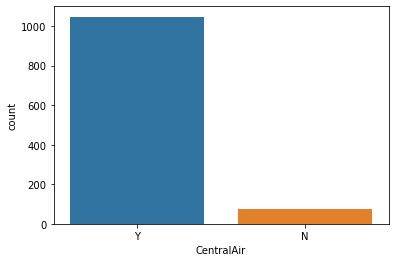

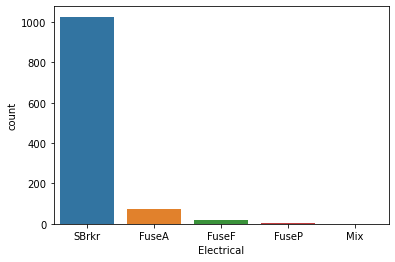

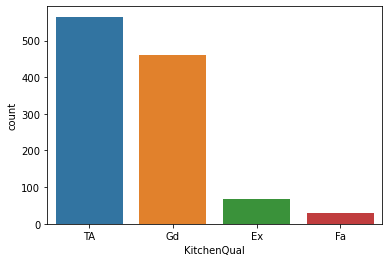

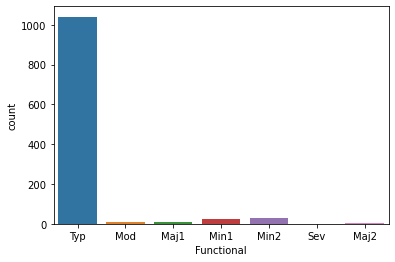

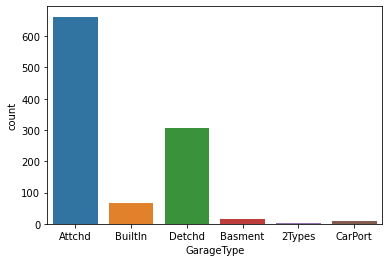

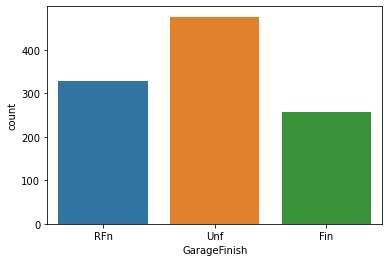

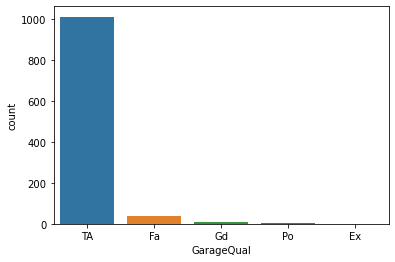

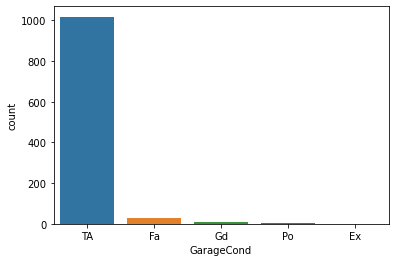

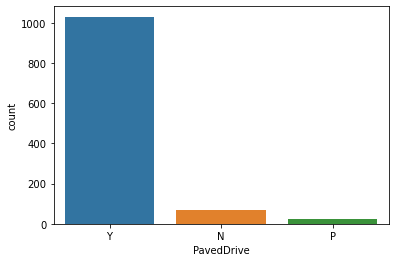

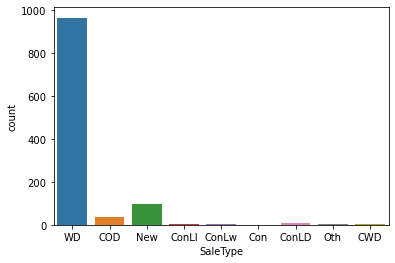

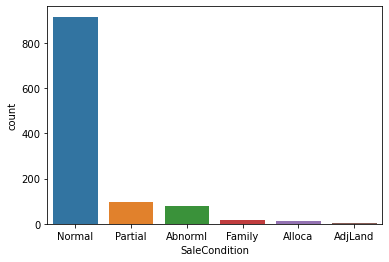

In [370]:
columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']
for i in columns:
    plt.figure()
    sb.countplot(train_data[i])

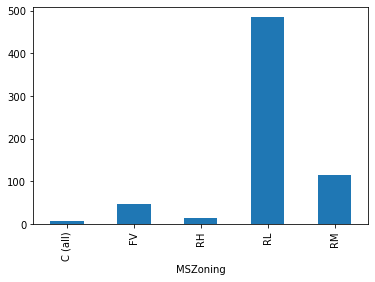

In [371]:
train_data.groupby('MSZoning')['SalePrice'].nunique().plot(kind='bar')
plt.show()

Houses in the category of Residential low density had a higher price range as compared to other categories.

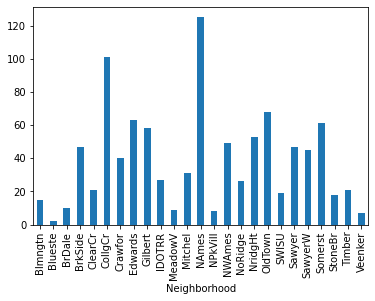

In [372]:
train_data.groupby('Neighborhood')['SalePrice'].nunique().plot(kind='bar')
plt.show()

houses near north Ames region had a higher price.

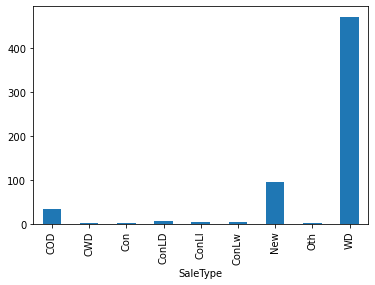

In [373]:
train_data.groupby('SaleType')['SalePrice'].nunique().plot(kind='bar')
plt.show()

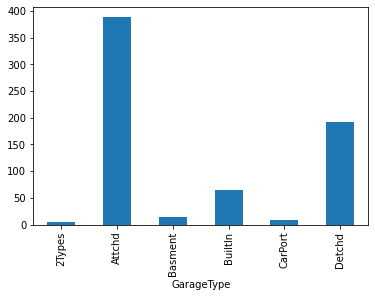

In [374]:
train_data.groupby('GarageType')['SalePrice'].nunique().plot(kind='bar')
plt.show()

Houses with attached garage had higher price as compared to detached one.

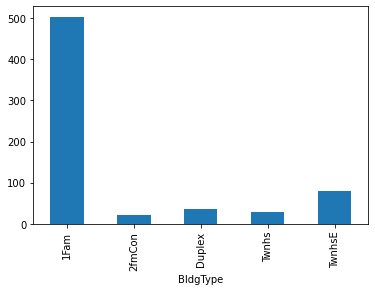

In [375]:
train_data.groupby('BldgType')['SalePrice'].nunique().plot(kind='bar')
plt.show()

1Family houses had more price.

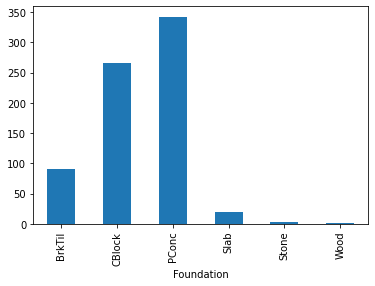

In [376]:
train_data.groupby('Foundation')['SalePrice'].nunique().plot(kind='bar')
plt.show()

Houses which had the concrete foundation had the highest price while the one with wooden foundation had the least price.

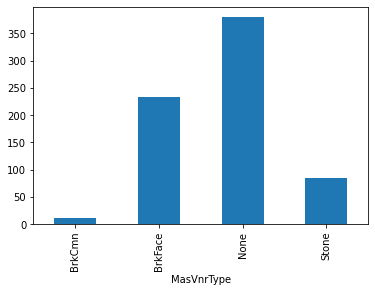

In [377]:
train_data.groupby('MasVnrType')['SalePrice'].nunique().plot(kind='bar')
plt.show()

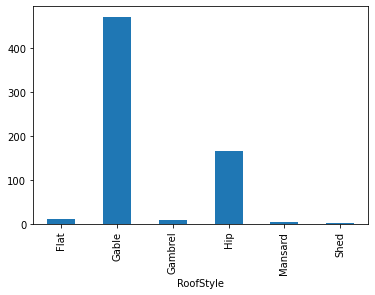

In [378]:
train_data.groupby('RoofStyle')['SalePrice'].nunique().plot(kind='bar')
plt.show()

Houses with Gable type of roof were more expensive.

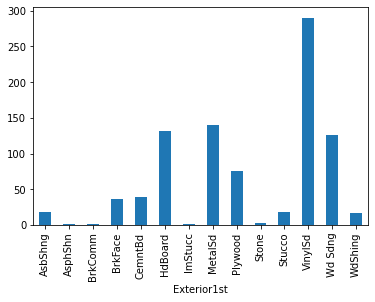

In [379]:
train_data.groupby('Exterior1st')['SalePrice'].nunique().plot(kind='bar')
plt.show()

Vinyl sided exteior has higher price.

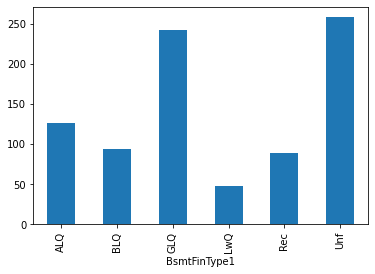

In [380]:
train_data.groupby('BsmtFinType1')['SalePrice'].nunique().plot(kind='bar')
plt.show()

# Handling Nan Values

# training dataset

In [381]:
#Numerical columns of Training dataset
train_data['MasVnrArea']=train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].median())
train_data['GarageYrBlt']=train_data['GarageYrBlt'].replace(np.nan,0)
train_data['LotFrontage']=train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())


In [382]:
#Categorical Columns with nan values of training dataset
train_data['MasVnrType']=train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0])
train_data['BsmtQual']=train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0])
train_data['BsmtCond']=train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode()[0])
train_data['BsmtFinType1']=train_data['BsmtFinType1'].fillna(train_data['BsmtFinType1'].mode()[0])
train_data['BsmtFinType2']=train_data['BsmtFinType2'].fillna(train_data['BsmtFinType2'].mode()[0])
train_data['BsmtExposure']=train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mode()[0])
train_data['GarageCond']=train_data['GarageCond'].fillna(train_data['GarageCond'].mode()[0])
train_data['GarageQual']=train_data['GarageQual'].fillna(train_data['GarageQual'].mode()[0])
train_data['GarageFinish']=train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0])
train_data['GarageType']=train_data['GarageType'].fillna(train_data['GarageType'].mode()[0])

All the missing values in categorical column were replaced by mode.

# testing dataset

In [383]:
#Numerical columns of Testing datset
test_data['MasVnrArea']=test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].median())
test_data['GarageYrBlt']=test_data['GarageYrBlt'].replace(np.nan,0)
test_data['LotFrontage']=test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean())

In [384]:
#Categorical Columns with nan values of testing dataset
test_data['MasVnrType']=test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0])
test_data['BsmtQual']=test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0])
test_data['BsmtCond']=test_data['BsmtCond'].fillna(test_data['BsmtCond'].mode()[0])
test_data['BsmtFinType1']=test_data['BsmtFinType1'].fillna(test_data['BsmtFinType1'].mode()[0])
test_data['BsmtFinType2']=test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode()[0])
test_data['BsmtExposure']=test_data['BsmtExposure'].fillna(test_data['BsmtExposure'].mode()[0])
test_data['GarageCond']=test_data['GarageCond'].fillna(test_data['GarageCond'].mode()[0])
test_data['GarageQual']=test_data['GarageQual'].fillna(test_data['GarageQual'].mode()[0])
test_data['GarageFinish']=test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode()[0])
test_data['GarageType']=test_data['GarageType'].fillna(test_data['GarageType'].mode()[0])
test_data['Electrical']=test_data['Electrical'].fillna(test_data['Electrical'].mode()[0])

In [385]:
train_data.drop(['Utilities','Id'],axis=1, inplace=True)

In [386]:
test_data.drop(['Utilities','Id'],axis=1, inplace=True)

In [387]:
df_train=train_data.copy()


In [388]:
df_test=test_data.copy()

# Transforming categorical data to numerical

In [389]:
from sklearn.preprocessing import OrdinalEncoder

In [390]:
#Train Dataset
list1=['LotShape', 'LandContour', 'LandSlope', 'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive']
oe=OrdinalEncoder()
for i in list1:
    train_data[i]=oe.fit_transform(train_data[i].values.reshape(-1,1))

All the categorical column with ordinal data were transformed into numerical by ordinal encoder

In [391]:
#test dataset
list1=['LotShape', 'LandContour', 'LandSlope', 'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive']
oe=OrdinalEncoder()
for i in list1:
    test_data[i]=oe.fit_transform(test_data[i].values.reshape(-1,1))

In [392]:
train_data.shape

(1123, 74)

In [399]:
test_data.shape

(292, 73)

In [394]:
#to see the categorical column without ordinal value
train_data.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'CentralAir', 'Electrical', 'Functional', 'GarageType', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [400]:
#to see the categorical column without ordinal value
test_data.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'CentralAir', 'Electrical', 'Functional', 'GarageType', 'SaleType',
       'SaleCondition'],
      dtype='object')

# One hot encoding of training dataset

In [396]:
#Train Dataset
train_data1=pd.get_dummies(train_data).copy()

In [397]:
train_data1.shape

(1123, 210)

# One hot encoding of test data set

In [401]:
#Test Dataset
test_data1=pd.get_dummies(test_data)

In [403]:
test_data1.shape

(292, 186)

# Splitting of Data

Now we will use only the train data set for model building.The test datset will be used only during testing of model

In [249]:
x=train_data1.drop('SalePrice', axis=1)
y=train_data1['SalePrice']

In [250]:
y.head(2)

0    128000
1    268000
Name: SalePrice, dtype: int64

In [251]:
x.shape

(1123, 209)

# Standarisation

In [404]:
from sklearn.preprocessing import StandardScaler

In [405]:
scaler=StandardScaler()

# training data standardisation

In [406]:
ScaledX=scaler.fit_transform(x)

# Test Data standardisation

In [407]:
ScaledTest=scaler.fit_transform(test_data1)

In [412]:
ScaledTest=pd.DataFrame(ScaledTest)

# PCA

In [256]:
from sklearn.decomposition import PCA

In [257]:
testpca=PCA()

In [258]:
New_x=testpca.fit(ScaledX)

In [261]:
New_x.explained_variance_ratio_

array([6.58018277e-02, 3.57237970e-02, 2.71004129e-02, 2.29954424e-02,
       2.02845348e-02, 1.86066000e-02, 1.70364994e-02, 1.53377148e-02,
       1.46790953e-02, 1.40011638e-02, 1.33079005e-02, 1.27023633e-02,
       1.23643219e-02, 1.21144763e-02, 1.17184413e-02, 1.14193476e-02,
       1.10405403e-02, 1.06033768e-02, 1.04896265e-02, 1.03843423e-02,
       1.02503902e-02, 9.94091302e-03, 9.75378400e-03, 9.49087254e-03,
       9.34926645e-03, 9.19951911e-03, 9.02511756e-03, 8.94314315e-03,
       8.86781283e-03, 8.68757540e-03, 8.48898863e-03, 8.39615692e-03,
       8.14842101e-03, 8.01240648e-03, 7.91778087e-03, 7.81326922e-03,
       7.63256591e-03, 7.57791089e-03, 7.52396670e-03, 7.41026921e-03,
       7.13841652e-03, 7.05069278e-03, 6.93067963e-03, 6.88110388e-03,
       6.73456996e-03, 6.67516415e-03, 6.57323417e-03, 6.54016332e-03,
       6.43768088e-03, 6.35863533e-03, 6.31882381e-03, 6.20410115e-03,
       6.13021788e-03, 6.10032204e-03, 5.95454828e-03, 5.89516930e-03,
      

In [262]:
var_cumu=np.cumsum(New_x.explained_variance_ratio_)*100

In [263]:
var_cumu

array([  6.58018277,  10.15256247,  12.86260375,  15.162148  ,
        17.19060148,  19.05126148,  20.75491142,  22.2886829 ,
        23.75659243,  25.15670881,  26.48749886,  27.7577352 ,
        28.99416739,  30.20561502,  31.37745915,  32.51939391,
        33.62344794,  34.68378562,  35.73274827,  36.7711825 ,
        37.79622152,  38.79031283,  39.76569123,  40.71477848,
        41.64970512,  42.56965704,  43.47216879,  44.36648311,
        45.25326439,  46.12202193,  46.97092079,  47.81053649,
        48.62537859,  49.42661923,  50.21839732,  50.99972424,
        51.76298083,  52.52077192,  53.27316859,  54.01419551,
        54.72803717,  55.43310644,  56.12617441,  56.81428479,
        57.48774179,  58.1552582 ,  58.81258162,  59.46659795,
        60.11036604,  60.74622958,  61.37811196,  61.99852207,
        62.61154386,  63.22157606,  63.81703089,  64.40654782,
        64.98947064,  65.56691785,  66.1395298 ,  66.70949598,
        67.27226884,  67.82857846,  68.37622359,  68.91

In [264]:
k=np.argmax(var_cumu>90)

In [265]:
print('number of components explaining 90 percent variance:',k)

number of components explaining 90 percent variance: 115


In [266]:
FinalPCA=PCA(n_components=k)

In [267]:
FinalData=FinalPCA.fit_transform(ScaledX)

In [268]:
FinalData=pd.DataFrame(FinalData)

In [269]:
FinalData.head()

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
0,0.437629,1.931862,3.771938,-1.556003,2.034864,1.485693,0.489604,-0.972339,2.213828,-0.381687,...,-0.591989,0.028089,-0.712939,0.895785,0.075824,-1.014018,-0.612389,-0.790347,0.218415,1.215509
1,-1.373940,5.482291,-4.497202,2.181441,2.935162,10.796660,1.965610,0.119080,-0.075850,-0.837849,...,-0.552094,-0.369587,1.610176,0.659824,0.289524,-0.577196,0.087159,-0.116874,0.376581,0.262343
2,-2.802342,-0.357125,-1.657326,-2.293346,-0.308126,0.574517,1.596821,0.584832,0.785009,0.144572,...,-0.730767,0.055813,0.191624,0.525256,-1.889953,-1.229815,0.227968,0.925086,-0.429615,0.162633
3,-1.888890,4.327309,-1.218308,0.735139,0.987200,-0.591886,-2.670345,-1.279021,-1.546283,-0.189381,...,1.059872,-0.233325,1.060772,-0.042475,-0.146114,0.416606,0.501377,-0.381932,0.396598,0.993065
4,-2.743281,2.624938,0.439013,-0.084894,0.306771,0.339805,-2.441220,1.515500,-1.858659,-0.318650,...,-0.537568,-0.517941,0.996921,2.183657,1.092708,1.222562,1.415629,0.803571,-0.314855,-0.466981


In [270]:
FinalData.shape

(1123, 115)

In [409]:
ScaledTest.shape

(292, 186)

In [ ]:
FinalData.head()

In [413]:
ScaledTest.head()

,0,1,2,3,4,5,6,7,8,9,...,176,177,178,179,180,181,182,183,184,185
0,-0.856054,0.981605,0.263894,-1.402669,-2.566101,-0.226274,2.157766,-0.464603,1.065430,1.031595,...,-0.131991,-0.058621,-0.058621,-0.058621,-0.240772,0.299253,-0.271163,-0.083045,0.392620,-0.248633
1,1.431981,0.000000,-0.363030,-1.402669,0.299297,-0.226274,1.419117,-0.464603,0.374523,-0.064496,...,7.576279,-0.058621,-0.058621,-0.058621,-0.240772,-3.341656,3.687818,-0.083045,-2.546994,-0.248633
2,-0.856054,0.000000,0.089636,0.745474,0.299297,-0.226274,1.419117,-0.464603,0.933828,0.782483,...,-0.131991,-0.058621,-0.058621,-0.058621,-0.240772,0.299253,-0.271163,-0.083045,0.392620,-0.248633
3,0.287963,0.429998,0.101809,0.745474,-3.998799,-0.226274,0.680468,1.419621,-1.040191,-1.758454,...,-0.131991,-0.058621,-0.058621,-0.058621,-0.240772,0.299253,-0.271163,-0.083045,0.392620,-0.248633
4,0.059160,0.981605,0.297033,-1.402669,0.299297,-0.226274,-0.058181,-0.464603,1.131230,1.081417,...,-0.131991,-0.058621,-0.058621,-0.058621,-0.240772,0.299253,-0.271163,-0.083045,0.392620,-0.248633


# To align the number of columns in test and train data set

Since the number of columns were different in train and test dataset after one hot encoding, we used align method

In [414]:
final_train,final_test=FinalData.align(ScaledTest,join='inner',axis=1)

In [415]:
final_train.shape

(1123, 115)

In [419]:
final_test.shape

(292, 115)

# ModelBuilding

In [271]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

Now train tst split will be done from the training dataset and the testing dataset is kept separate for validation

In [272]:
x_train,x_test,y_train,y_test=train_test_split(FinalData,y,test_size=0.30,random_state=1)

In [273]:
lnr=LinearRegression()
lnr.fit(x_train,y_train)
lnr.coef_
lnr.score(x_train,y_train)

0.8910439475731892

In [274]:
predlnr=lnr.predict(x_test)
print('mae_lnr',mean_absolute_error(y_test,predlnr))
print('mse_lnr',mean_squared_error(y_test,predlnr))
print('r2 score_lnr',r2_score(y_test,predlnr))

mae_lnr 19222.649690493334
mse_lnr 753470267.0707211
r2 score_lnr 0.8513716552378675


In [275]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)

0.9712248738762741

In [276]:
predrfr=rfr.predict(x_test)
print('mae_rfr',mean_absolute_error(y_test,predrfr))
print('mse_rfr',mean_squared_error(y_test,predrfr))
print('r2 score_rfr',r2_score(y_test,predrfr))

mae_rfr 18099.081335311574
mse_rfr 662265579.7848738
r2 score_rfr 0.8693625465819198


The r2 score of linearRegressor was found 85 percent and that of Random Forest was 86.9 percent

# Crossvalidation

In [277]:
from sklearn.model_selection import cross_val_score
print ("cross val score for linear regression is:",cross_val_score(lnr,FinalData,y,scoring='r2',cv=3).mean())
print ("cross val score for random forest regressor is:",cross_val_score(rfr,FinalData,y,scoring='r2',cv=3).mean())

cross val score for linear regression is: 0.7644688119576489
cross val score for random forest regressor is: 0.8142898889621143


There was less difference in r2 score and crossval score in Random Forest Regressor.So we will proceed with Hyperparameter tuning of RFR

In [278]:
from sklearn.model_selection import RandomizedSearchCV

In [279]:
rfr=RandomForestRegressor()

n_estimators= [100,200,400,500,800,1000]
max_features= ['auto','sqrt','log2']
min_samples_split= [2,4,5,7,10]
min_samples_leaf= [1,2,5,7,9]

In [280]:

params={'n_estimators':n_estimators,
    'max_features':max_features,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
    }

In [281]:
params

{'n_estimators': [100, 200, 400, 500, 800, 1000],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_split': [2, 4, 5, 7, 10],
 'min_samples_leaf': [1, 2, 5, 7, 9]}

In [282]:
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=1, n_jobs = -1)

In [283]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 7, 9],
                                        'min_samples_split': [2, 4, 5, 7, 10],
                                        'n_estimators': [100, 200, 400, 500,
                                                         800, 1000]},
                   random_state=1, verbose=2)

In [284]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto'}

# Final model with best parameter

In [285]:
final_model=RandomForestRegressor(n_estimators=200,min_samples_split=2,min_samples_leaf=2,max_features='auto')

In [286]:
final_model.fit(x_train,y_train)
final_model.score(x_train,y_train)

0.9678085331100079

In [287]:
predfinal=final_model.predict(x_test)
print('mae_final_model',mean_absolute_error(y_test,predfinal))
print('mse_final_model',mean_squared_error(y_test,predfinal))
print('r2 score_final_model',r2_score(y_test,predfinal))


mae_final_model 18117.94784947092
mse_final_model 662060048.1225256
r2 score_final_model 0.8694030894302658


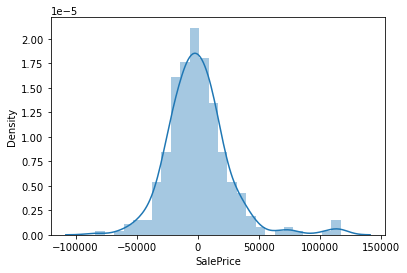

In [288]:
sb.distplot(y_test-predfinal)
plt.show()

# Saving the model

In [418]:
import joblib


filename='finalhousepricemodel.pkl'

joblib.dump(final_model,'finalhousepricemodel.pkl')


['finalhousepricemodel.pkl']

# Predicting the house price of the test dataset by the final model

In [420]:
#predicting the house price of the test data set...
test_pred=final_model.predict(final_test)


In [421]:
print(test_pred)


[167033.70071429 153951.96500458 172231.1288254  158107.84714286
 157052.45946429 131863.45506782 131007.67136111 164165.98236111
 161072.17321429 154094.51650794 177174.6656746  177916.80366667
 177204.35325397 174588.58503968 166354.72882937 167484.2672619
 178906.15039683 178461.39511905 130293.4158254  128152.56040873
 160648.26303571 170739.46992063 173893.58936111 127558.32874206
 177664.19789683 179842.37718254 163305.03767857 171859.55523413
 159531.18358135 171628.86980159 156870.6415873  176744.78749603
 172360.67898413 171183.64680556 178753.71444444 153631.74386905
 161897.6328373  129463.90950397 161118.51309524 130670.41743254
 178173.86650794 159917.72569444 159822.07434524 176491.24015476
 160637.21446429 166380.24250992 173864.99590476 172249.48480159
 151864.7985119  162191.89640873 165094.13630952 188182.88968254
 166473.5380754  165857.5975     158460.03980159 161534.09857143
 165753.69184524 161141.97125    168259.28720238 168526.97099206
 133080.86505159 164920.21